In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these) and # Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Drop any duplicate values
city_data = city_data.drop_duplicates('city')
#city_data.head(25)

# Combine the data into a single dataset
combined_city_ride_data = pd.merge(city_data, ride_data, on = "city", how = 'outer')

# Display the data table for preview
combined_city_ride_data.head(15)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [2]:
#Create 3 sub groups for the bubble plot
urban_city = combined_city_ride_data.loc[(combined_city_ride_data["type"] == "Urban")]
suburban_city = combined_city_ride_data.loc[(combined_city_ride_data["type"] == "Suburban")]
rural_city = combined_city_ride_data.loc[(combined_city_ride_data["type"] == "Rural")]

# Per city calculations of Average Fare, Total Rides and Total Drivers for Urban cities
avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban_city.groupby(['city']).count()['ride_id']
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Suburban cities
avg_fare_suburban_city = suburban_city.groupby(['city'])['fare'].mean()
total_rides_suburban_city = suburban_city.groupby(['city']).count()['ride_id']
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].value_counts()

# Per city calculations of Average Fare, Total Rides and Total Drivers for Rural cities
avg_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()
total_rides_rural_city = rural_city.groupby(['city']).count()['ride_id']
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()

## Bubble Plot of Ride Sharing Data

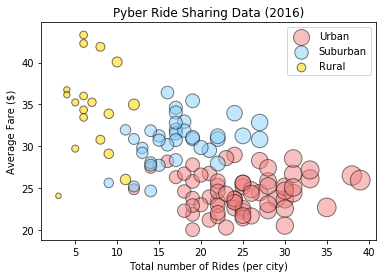

In [3]:
# Obtain the x and y coordinates for each of the three city types; x = Total number of Rides per city and Y = average fair $
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            #s=x_axis, alpha=0.75)
# Build the scatter plots for each city types
plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban_city, avg_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")
# Incorporate the other graph properties

# Create a legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.legend(loc='upper right')
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("Images/Ride-Share-Bubble.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

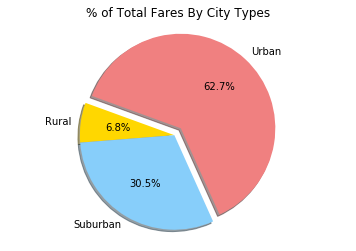

In [5]:
# Calculate Type Percents
total_fare = combined_city_ride_data.groupby(['type'])['fare'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.savefig("Images/%ofTotalFaresByCityTypes.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

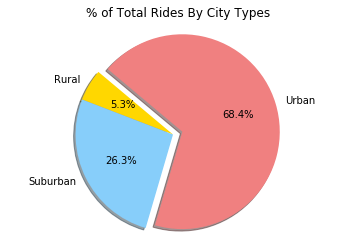

In [7]:
# Calculate Ride Percents
total_rides = combined_city_ride_data.groupby(['type'])['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("Images/%ofTotalRidesByCityTypes.png")


In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

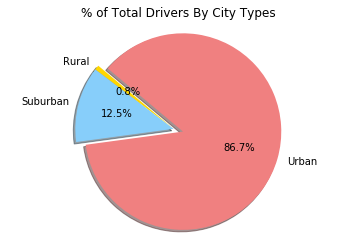

In [9]:
# Calculate Driver Percents
total_drivers = combined_city_ride_data.groupby(['type'])['driver_count'].sum()
labels = ["Rural","Suburban","Urban" ]
# Build Pie Charts
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
# Save Figure
plt.savefig("Images/%ofTotalDriversByCityTypes.png")

In [10]:
# Show Figure
plt.show()